This is the simulation of the stochastic Wave equation with multiplicative noise.
We want to simulate a wave on the spatial domain [0,1] and time domain [0,1]

In [1]:
# Let's try some simulations.
import math

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from scipy.stats import norm

%matplotlib inline
import matplotlib
# Force matplotlib to not use any Xwindows backend.
matplotlib.use('Agg')


/home/thomas_schnake/virt3_thomas/lib/python3.4/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Let us first generate some usefull objects

def funcOfOperator(f, lambda_h, e_h, MassMat, StiffMat, x):
    '''
    param: f: a lambda-function.
    param: lambda_h: of type R^N Eigenvalues of the discrete operator.
    param: e_h: of type R^{n x n}. Eigenfunctions of the discrete Laplace operator.
    parma: MassMat: The mass matrix for the given domain.
    param: StiffMat: Stiffness matrix.
    param: x: of type R^n. The function on which the operator should bet evluated.
    return: of type R^n. The result as a function.
    '''
    pass

def generateStiffness(N):
    A = np.zeros((N,N))
    h= 1/(N+1)
    # We give it just explicite
    
    for i in range(N):
        for j in range(N):
            if i == j:
                A[i,j] = 2/h
            elif abs(i-j) == 1:
                A[i,j] = -1/h
            else:
                pass
    return A

0.005284000000017386
0.010423000000002958
0.017766999999992095
0.04457500000000891
0.07477500000004511
0.10014100000000781
0.15859300000005305
0.21633500000001504
0.29171800000000303
0.2883380000000102
0.36891000000002805
0.4675940000000196
0.6203279999999722
0.7638369999999668
1.1402120000000195
1.3878399999999829
1.6940320000000497
2.3787000000000376
2.505603000000008
3.212040000000002
4.118190000000027
4.661685999999975
5.500358000000006
6.241401999999994
7.413996999999995
8.778441000000043
9.65961500000003
10.92417800000004
12.62373500000001
13.984027999999967
16.235028999999997
17.21250200000003
19.045357000000024
21.030618999999888
22.754854000000023
24.923877999999945
26.915055999999936
28.19547
31.657789999999977


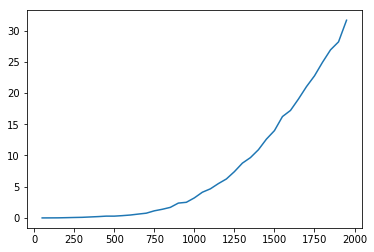

In [60]:
# Let's start a cluster
import os
import ipyparallel as ipp

rc = ipp.Client()
ar = rc[:].apply_async(os.getpid)
pid_map = ar.get_dict()
#######

# Let us try to generate the eigenvalues and eigenvectors from the stiffness matrix.
import time

N = 10000
h = 1/(N+1)

# For this setting we give the stiffness matrix explicite


timecosts = []
dimensionRange = np.arange(50,2000, 50)

for n in dimensionRange:
    A = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            if i == j:
                A[i,j] = 2/h
            elif abs(i-j) == 1:
                A[i,j] = -1/h
            else:
                pass
    
    # Let's test how the duration of the svd calculation increses due to the dimension.
    now = time.clock()
    U, s, V = np.linalg.svd(A, full_matrices=True)
    timecosts.append(time.clock() - now)
    print(str(time.clock() - now))

    
plt.plot(dimensionRange, timecosts)
plt.show()

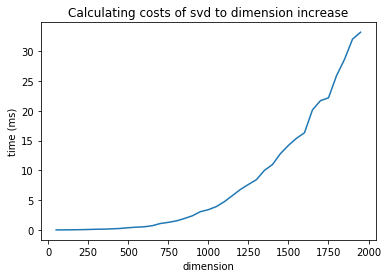

In [5]:
plt.ylabel('time (ms)')
plt.xlabel('dimension')
plt.plot(dimensionRange, timecosts)

plt.title('Calculating costs of svd to dimension increase.')

plt.show()

In [3]:
# Let us define our sheme due to the discrete semigroups

# Let us first do the deterministic version of the process:

M = 100 # Time discretization
k = 1/M
N = 500 # Space discretization
h = 1/(N+1)

A = generateStiffness(N)

# Generate the eigenpairs of A
U, s, V = np.linalg.svd(A, full_matrices=True)

# It should be just U*f(S)*V *v 
abstrLamb = lambda U, s, V, func, vec : np.dot( np.dot(U, np.dot(np.diag(func(s)), V)) , vec)






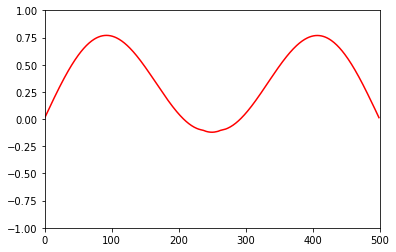

In [41]:
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_ylim(-1, 1)
ax.set_xlim(0, 500)

##### TEST ######
u_0 = np.concatenate((np.arange(h, .5 ,h), np.arange(.5-h , 0, -h)))

# u_0 = np.sin(4*math.pi* np.arange(h,1,h))
v_0 = np.sin(3*math.pi* np.arange(h,1,h))

n = 60

t = n*k

sink = lambda x : np.sin( t*x**(1/2) )
cosk = lambda x : np.cos( t*x**(1/2) )

Lambda_12 = lambda x : x**(-1/2)

u = abstrLamb(U, s, V, cosk, u_0) + abstrLamb(U, s, V, Lambda_12, abstrLamb(U, s, V, sink, v_0))


#plt.plot(range(N), v, 'r', range(N), tempResult, 'b', range(N), tempResult2, 'g')
plt.plot(range(N), u, 'r')
plt.show()

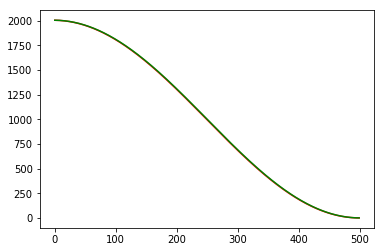

In [59]:
lambda_h = lambda j,h : 4/h * ( np.sin( h*j*math.pi/2 ) )**2 

yaxis = lambda_h(np.array(range(N)), h)
yaxis = np.sort(yaxis)
#print(yaxis)
#print(np.array(range(N))[-1::-1])
plt.plot(range(N), yaxis[-1::-1],'r', range(N), s, 'g')
#plt.plot(range(N), s)
#plt.show()


In [17]:

# 1) An explicite representation the basis our orthonormal basis is given by.
mu = lambda j,s : (j* math.pi)**(-s*2)

e = lambda j : lambda y: math.sqrt(2)*np.sin(j* math.pi * y)

# So we generate samples for for a truncated brownian motion.
#J = 10
#s=1

# Let us generate gaußian process on \R


#dt = 0.1
#N = 200

# Initial value.
x = 0.
xValues = [x]

for i in range(N):
    x = x + norm.rvs(scale=dt)
    xValues.append(x)
    
# Lets sample a trajectory of a more complex brownian motion.



def GenBrownianMotion(mu, e, M, N, J, s,  seed=0):
    '''
    param: mu: lambda function for the eigenvalues of the covariance operator.
    param: e: eigenfunctions of the covariance operator.
    param: M: Number of time discretizations.
    param: N: Number of spatial discretizations.
    param: J: Number of the truncations
    param: seed:
    '''
    randomField = np.zeros((M,N))
    np.random.seed(seed=seed)
    
    # Let's generate J brownian motion trajectories on the time interval (0,1)
    brownianMotions = np.zeros((J,M))
    for j in range(M-1):
        for i in range(J):
            brownianMotions[i,j+1] = brownianMotions[i,j] + norm.rvs(scale=(1/M))
    
    # Let's generate the whole random field
    # Time
    for j in range(M):
        # Space
        for n in range(N):
            # 'complexity'
            tempValue = 0.
            for i in range(J):
                tempValue = tempValue + math.sqrt(mu(i+1,s))* e(i+1)(n/(N+1))*brownianMotions[i,j]
            
            randomField[j,n] = tempValue
            
    return randomField
                


In [165]:
# Time discretization
M = 100
# Spatial discretizatin
N = 100
# Truncation
J = 50
s=0.5
seed = 3
randomField = GenBrownianMotion(mu, e, M, N, J, s, seed)

timeAxes = np.arange(0, 1, 1/M)
spaceAxes = np.arange(0,1, 1/N) # this is technically not true


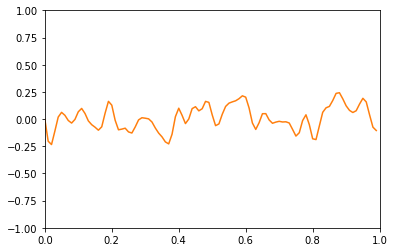

(100, 100)


In [168]:
n=80
m=8
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-1, 1))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,


def animationTime(i):
    line.set_data(spaceAxes, randomField[i, :])
    
    return line,

def animationSpace(i):
    pass



#anim = animation.FuncAnimation(fig, animationTime, frames=M, interval=100, blit=True)

plt.plot(spaceAxes, randomField[-1, :])

plt.show()

print(randomField.shape)